## Import Necessary Libraries

In [1]:
import pandas as pd  # veri analizi ve manipülasyonu için kullanılan güçlü bir Python kütüphanesidir.
import numpy as np  # sayısal hesaplamalar için kullanılan bir başka temel Python kütüphanesidir.
import matplotlib.pyplot as plt  # matplotlib kütüphanesinin pyplot modülünü içe aktarır. Matplotlib, grafik çizimi ve görselleştirmesi için kullanılır.
import seaborn as sns  # veri görselleştirmesi için daha yüksek seviye bir arayüz sağlar ve matplotlib’in üzerine inşa edilmiştir

# Jupyter Notebook veya Jupyter Lab gibi ortamlarda grafiklerin doğrudan hücre içinde görüntülenmesini sağlar.
%matplotlib inline

# matplotlib kütüphanesinin grafik boyutunu ayarlar. Burada (10, 6) boyutunda bir grafik alanı belirlenmiştir.
plt.rcParams["figure.figsize"] = (10, 6)

# Seaborn kütüphanesini kullanarak grafiklerin arka planını ve çizgi tarzını ayarlar.
# "whitegrid" stilini kullanarak beyaz arka plan ve ızgara çizgileri oluşturulur.
sns.set_style("whitegrid")

# pandas veri çerçevelerinde ondalık sayıların nasıl görüntüleneceğini ayarlar. Burada ondalık sayılar iki basamaklı olarak gösterilir.
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# pandas veri çerçevelerinde görüntülenecek maksimum satır ve sütun sayısını ayarlar.
# Örneğin, bu kodda en fazla 10 satır ve 25 sütun görüntülenecektir.
pd.options.display.max_rows = 10
pd.options.display.max_columns = 25

# uyarı mesajlarını görmezden gelmek için kullanılır. Eğer uyarı mesajlarını görmek istemiyorsanız bu satırları kullanabilirsiniz.
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [16]:
# Important Libraries for Machine Learning and Deep Learning

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

from keras.utils import to_categorical
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# Avoid OOM errors by setting GPU Memory Consumption Growth 

# (TensorFlow kullanarak GPU belleği tüketimini yönetmek için kullanılır. Özellikle, GPU belleği tüketiminin aşamalı olarak artmasını sağlar ve bu sayede “Out of Memory” (OOM) hatalarını önlemeye yardımcı olur.)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## Load Dataset & Description 

The FER2013 dataset is a popular dataset used for facial expression recognition tasks. It contains approximately 30,000 grayscale images of faces, each sized at 48x48 pixels. The training set consists of 28,709 examples and the public test set consists of 3,589 examples. These images are labeled with one of seven emotions: Angry, Disgust, Fear, Happy, Sad, Surprise, and Neutral.

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [1]:
# You can download csv data from this link 

# https://www.kaggle.com/datasets/nicolejyt/facialexpressionrecognition 

In [3]:
df=pd.read_csv('fer2013.csv')

df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:

print(df.info())
print()

print(df.isna().sum())
print()

print(df.shape)
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None

emotion    0
pixels     0
Usage      0
dtype: int64

(35887, 3)



### Duplicate Check

In [5]:
df[df.duplicated(keep=False)]

,emotion,pixels,Usage
30,3,234 233 228 231 234 233 236 230 236 196 112 85...,Training
38,0,255 82 0 3 0 0 0 0 0 0 3 0 16 17 3 60 29 0 1 2...,Training
50,2,99 95 101 114 124 129 128 127 128 124 123 125 ...,Training
62,3,210 161 140 166 159 98 96 141 157 137 110 107 ...,Training
69,5,43 43 43 40 45 63 93 140 144 153 159 167 168 1...,Training
...,...,...,...
35388,5,229 229 215 150 150 196 158 144 162 134 142 15...,PrivateTest
35489,0,1 30 98 117 115 86 44 43 65 120 128 99 85 82 7...,PrivateTest
35607,0,214 215 213 210 93 35 43 96 118 118 118 119 11...,PrivateTest
35610,4,133 183 181 194 181 179 207 205 211 194 195 21...,PrivateTest


In [6]:
df.loc[30]["pixels"]

'234 233 228 231 234 233 236 230 236 196 112 85 100 114 129 133 132 132 147 164 180 156 161 156 151 150 137 117 139 157 138 145 137 132 114 94 80 70 65 88 88 144 228 227 228 225 229 224 229 230 232 234 232 234 234 235 231 115 71 89 87 115 151 169 168 167 185 208 226 203 175 189 179 166 169 170 167 180 191 200 187 163 185 158 96 69 88 81 81 126 221 229 225 224 221 218 232 228 235 238 235 237 234 241 174 77 78 93 128 169 204 218 219 225 236 242 243 241 213 196 193 191 203 212 216 220 228 226 230 195 164 187 146 92 87 100 94 110 188 241 230 226 226 226 232 230 234 235 235 233 226 192 113 71 90 132 194 224 233 235 243 245 248 250 249 248 248 237 231 236 240 244 245 245 245 242 242 244 216 207 222 187 138 109 104 91 121 198 229 225 228 226 233 228 233 240 235 238 206 109 83 72 122 197 236 241 243 246 247 248 248 252 251 249 250 250 251 250 249 248 249 249 249 250 247 247 252 252 248 251 219 164 123 86 81 115 200 220 228 226 236 235 238 235 231 240 193 106 75 86 185 236 243 247 247 245 247 2

In [7]:
#Last Check İf it is certain duplicated or not 

df[df.pixels == '234 233 228 231 234 233 236 230 236 196 112 85 100 114 129 133 132 132 147 164 180 156 161 156 151 150 137 117 139 157 138 145 137 132 114 94 80 70 65 88 88 144 228 227 228 225 229 224 229 230 232 234 232 234 234 235 231 115 71 89 87 115 151 169 168 167 185 208 226 203 175 189 179 166 169 170 167 180 191 200 187 163 185 158 96 69 88 81 81 126 221 229 225 224 221 218 232 228 235 238 235 237 234 241 174 77 78 93 128 169 204 218 219 225 236 242 243 241 213 196 193 191 203 212 216 220 228 226 230 195 164 187 146 92 87 100 94 110 188 241 230 226 226 226 232 230 234 235 235 233 226 192 113 71 90 132 194 224 233 235 243 245 248 250 249 248 248 237 231 236 240 244 245 245 245 242 242 244 216 207 222 187 138 109 104 91 121 198 229 225 228 226 233 228 233 240 235 238 206 109 83 72 122 197 236 241 243 246 247 248 248 252 251 249 250 250 251 250 249 248 249 249 249 250 247 247 252 252 248 251 219 164 123 86 81 115 200 220 228 226 236 235 238 235 231 240 193 106 75 86 185 236 243 247 247 245 247 250 252 252 251 250 251 251 250 251 249 249 249 249 249 249 250 250 248 248 248 246 242 208 148 111 95 75 143 229 226 233 236 232 237 234 236 240 166 93 89 149 235 244 245 246 247 247 249 250 251 252 251 252 251 251 251 252 252 252 252 251 250 251 251 250 249 249 249 247 244 227 174 118 99 93 85 217 234 223 238 238 240 236 241 234 157 103 120 201 245 246 247 247 248 248 250 252 252 252 252 252 251 250 252 252 253 253 254 254 254 253 252 250 249 248 248 248 246 239 199 145 120 95 78 184 241 218 237 237 241 237 241 208 119 109 145 219 245 248 247 247 251 251 252 255 255 254 252 253 252 252 253 254 255 255 255 255 255 254 253 252 250 248 248 248 246 242 217 164 125 105 66 136 236 232 235 233 237 234 241 188 89 111 169 228 245 247 248 248 250 253 254 254 254 252 250 253 252 253 254 254 254 254 255 254 255 254 254 252 250 247 248 246 244 240 227 181 126 101 77 83 226 222 234 234 231 234 241 153 87 128 186 227 245 247 248 249 250 253 254 253 254 255 254 253 253 254 254 254 254 254 254 255 254 253 253 253 252 249 246 244 243 242 230 192 142 95 75 74 211 223 234 235 237 241 222 108 101 139 190 228 241 244 248 249 250 253 253 252 253 254 254 254 254 254 254 254 253 252 253 251 251 250 251 252 253 252 249 245 242 242 238 207 150 98 65 63 191 236 236 237 239 246 205 98 111 144 208 237 241 243 246 250 250 250 248 248 250 250 252 253 253 252 252 250 249 249 248 248 246 239 233 231 234 240 249 251 248 242 239 227 162 114 71 58 167 237 236 234 235 243 175 74 79 141 222 239 244 247 249 253 252 250 250 248 248 248 246 246 246 246 244 241 237 227 201 181 165 154 148 151 165 178 194 208 221 234 234 234 176 107 80 44 150 240 235 234 232 242 164 66 74 155 230 238 248 250 244 231 220 209 199 187 198 213 226 229 229 229 229 221 212 188 146 111 92 88 97 111 123 137 156 175 205 220 230 234 197 99 72 52 173 236 235 237 237 244 190 66 80 175 236 236 226 211 197 166 138 115 99 102 130 160 182 202 208 212 213 198 187 160 142 131 128 136 154 168 172 176 178 189 212 221 229 232 212 107 72 80 196 230 236 236 237 242 211 83 79 192 238 217 190 167 146 135 125 110 106 109 119 139 153 174 189 201 206 195 178 160 148 144 150 167 188 195 191 185 183 181 194 215 230 231 223 127 71 79 199 228 233 238 235 239 238 118 80 206 237 210 185 180 184 182 180 179 165 145 138 136 141 158 190 218 224 213 185 155 146 144 156 180 198 204 211 191 155 164 177 205 226 229 228 157 94 95 207 234 234 239 236 237 242 141 89 213 238 215 192 189 185 188 204 206 182 157 135 133 133 148 210 247 251 244 194 155 143 141 143 114 103 106 137 187 179 152 170 195 220 230 232 177 106 102 206 232 233 237 236 236 242 174 97 209 240 214 184 157 165 188 148 111 105 108 131 133 149 155 220 255 253 252 208 184 161 135 158 112 76 83 128 136 152 180 183 199 224 233 236 184 120 117 216 227 236 230 231 232 237 194 110 205 237 210 173 153 149 130 114 72 77 120 161 144 177 198 238 255 253 253 231 207 199 183 198 192 180 182 199 206 207 213 214 222 236 237 236 180 123 189 238 227 240 236 233 229 239 193 116 210 236 217 199 191 175 182 198 171 177 193 195 196 205 218 248 254 254 253 244 225 210 193 180 190 195 195 195 197 198 219 235 240 241 237 238 188 135 157 167 215 232 239 237 234 239 210 123 211 240 235 230 224 211 203 202 205 197 187 184 204 221 236 250 255 254 252 246 238 232 225 203 178 168 170 181 199 221 236 244 246 245 237 236 189 145 135 157 226 235 236 239 234 240 202 133 214 240 242 244 237 219 197 180 174 180 202 228 241 240 239 249 254 254 251 247 242 241 245 246 240 233 231 237 244 249 251 250 249 245 234 230 173 159 175 189 238 232 237 234 233 241 228 155 207 237 239 244 246 248 243 240 239 244 252 250 247 243 241 249 254 253 251 247 245 244 246 247 250 251 252 253 253 252 253 251 247 243 229 225 165 198 206 201 237 231 235 234 234 239 236 179 196 234 241 247 252 252 253 254 253 251 250 250 243 240 244 250 254 254 252 247 244 240 245 250 249 250 254 253 254 253 251 246 240 238 226 219 155 188 221 211 234 238 236 239 240 237 242 188 188 228 237 245 248 251 253 253 253 252 247 232 228 242 243 251 254 253 251 244 246 247 231 227 239 248 251 251 252 252 251 246 241 232 225 212 148 163 220 224 231 233 237 238 235 235 239 219 168 221 234 240 246 249 251 251 250 242 219 197 233 249 245 252 252 249 248 244 249 253 227 187 205 232 244 246 247 248 247 246 240 231 223 210 170 182 231 230 228 229 236 237 235 241 235 244 185 205 237 241 246 246 245 244 234 212 187 184 219 241 239 240 242 236 229 231 238 230 207 185 181 204 223 230 231 236 240 240 237 228 222 209 210 222 231 224 226 234 232 234 232 237 238 239 224 206 230 238 242 240 235 225 212 186 174 190 191 177 177 191 196 192 177 174 170 178 193 194 175 175 198 211 208 220 227 231 229 223 220 210 247 224 221 221 224 229 226 228 232 239 235 235 230 227 225 229 228 225 219 207 191 173 186 210 215 177 129 138 141 153 159 143 147 193 214 208 189 157 169 195 204 212 214 218 220 221 214 195 225 222 224 227 227 230 233 238 239 234 237 238 227 212 219 220 217 214 205 189 170 174 203 221 230 214 180 146 129 135 164 180 196 216 228 222 207 169 140 161 190 199 208 212 216 215 207 194 203 220 235 230 225 234 232 239 236 233 237 241 234 194 207 208 210 208 194 172 156 180 207 228 239 231 206 173 134 121 139 181 209 230 243 240 223 206 177 137 161 193 205 213 215 209 193 181 207 233 238 235 228 224 224 230 228 228 236 229 239 217 197 207 209 204 185 152 149 185 210 235 238 230 218 203 189 186 188 198 214 221 227 233 232 211 190 157 136 186 202 208 207 203 192 208 229 226 236 234 225 231 228 231 235 233 235 226 228 233 208 199 208 204 188 160 155 155 162 174 165 152 152 153 158 163 164 157 154 147 152 151 138 118 146 171 168 189 197 197 195 194 189 223 232 231 227 225 215 230 232 232 237 236 228 230 228 235 214 191 201 199 195 188 188 162 86 81 168 182 185 193 216 186 214 213 195 198 205 168 77 112 197 198 196 200 193 190 190 188 188 230 231 229 226 223 217 232 235 231 232 231 228 229 227 237 226 183 187 189 193 205 208 221 185 124 217 242 254 255 255 255 255 255 255 252 247 199 152 210 225 208 206 202 192 184 185 182 198 232 229 230 232 228 217 230 231 217 227 229 230 230 231 234 234 189 178 188 183 201 211 226 237 189 144 160 177 205 237 218 220 223 199 188 174 180 213 231 220 209 209 202 189 179 184 174 204 229 226 229 225 218 214 225 225 221 228 230 220 224 228 231 234 210 168 182 188 199 210 224 233 233 199 188 188 190 199 183 181 195 187 171 195 222 225 229 221 211 215 195 175 179 175 174 224 227 228 227 224 229 224 227 230 228 227 230 230 223 226 232 239 232 177 167 182 201 207 224 235 229 225 235 226 214 208 211 206 207 210 226 236 221 228 230 221 214 211 182 170 179 169 174 216 228 228 229 224 229 227 230 232 231 226 230 230 230 237 224 193 146 121 157 159 180 204 213 234 236 219 213 224 220 213 212 212 211 215 210 206 220 231 227 213 209 197 170 176 170 171 143 112 155 188 219 222 221 221 224 225 231 228 226 236 219 180 130 95 77 57 116 162 160 192 205 233 239 224 208 196 191 192 193 189 183 183 186 203 223 233 227 205 198 184 171 177 161 190 156 71 96 114 140 177 209 218 225 222 225 234 225 190 147 108 83 68 57 60 93 167 165 180 200 229 240 229 212 200 186 178 177 171 172 180 196 215 230 239 226 200 190 177 184 174 165 211 217 78 78 93 102 128 165 212 221 221 229 217 173 140 108 85 67 57 78 101 98 175 171 166 187 218 238 240 225 211 202 196 190 192 193 202 219 231 240 236 224 201 182 176 178 168 187 218 253 143 66 85 82 110 150 176 225 225 200 159 139 113 95 83 60 77 106 93 69 170 191 167 173 208 234 244 242 235 230 229 226 226 231 236 238 240 240 230 218 187 163 172 171 176 204 222 250 218 69 92 83 100 157 169 215 181 149 125 106 116 118 76 66 99 97 59 110 227 194 181 164 189 227 244 244 244 246 245 240 237 241 243 245 243 236 227 201 156 156 172 176 193 218 221 240 255 124 63 87 108 159 169 166 140 123 110 125 136 127 79 75 100 81 50 204 230 203 190 179 166 196 230 238 239 238 232 230 227 231 235 228 225 221 210 174 143 164 172 183 203 223 213 242 254 232 74 33 104 164 169 142 123 118 130 139 135 131 94 77 99 81 96 244 192 214 197 186 172 171 205 220 231 234 232 227 226 225 227 221 210 198 181 148 158 168 175 195 212 219 210 253 250 251 162 15 95 164 169']

,emotion,pixels,Usage
30,3,234 233 228 231 234 233 236 230 236 196 112 85...,Training
19215,3,234 233 228 231 234 233 236 230 236 196 112 85...,Training


In [8]:
# Duplicate Drop

df = df.drop_duplicates(keep='first')

### Outlier Check

Outlier Check could not be done because pixels colum is "object" and is being represetend to pictures which are belogn to 7 different classes.

In [9]:
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

emotion_label = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

Text(0.5, 1.0, '0:Angry | 1:Disgust | 2:Fear | 3:Happy | 4:Sad | 5:Surprise | 6:Neutral')

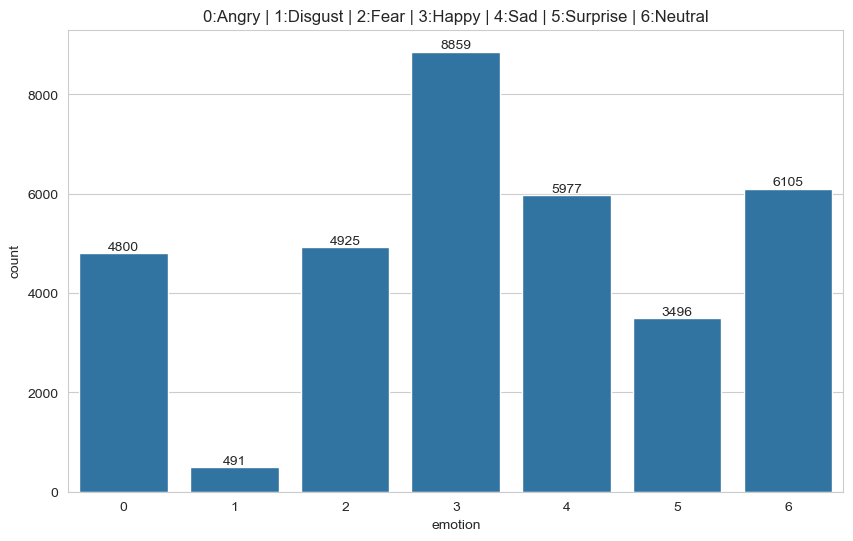

In [10]:
ax = sns.countplot(x="emotion", data=df,)
ax.bar_label(ax.containers[0])

ax.set_title('0:Angry | 1:Disgust | 2:Fear | 3:Happy | 4:Sad | 5:Surprise | 6:Neutral')

In [11]:
df['Usage'].value_counts()

Usage
Training       27515
PrivateTest     3574
PublicTest      3564
Name: count, dtype: int64

## Data Spliting

In [17]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48



In [18]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')

X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [19]:
train_y=to_categorical(train_y, num_classes=num_labels)
test_y=to_categorical(test_y, num_classes=num_labels)

## Normalization of Data

In [20]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [22]:
print(f"X_train shape:{X_train.shape}")

print(f"X_test shape:{X_test.shape}")

X_train shape:(27515, 48, 48, 1)
X_test shape:(3564, 48, 48, 1)


## CNN Model

In [23]:
#1st Convolution Layer 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd Convolution Layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd Convolution Layer

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Flatten())

#Fully Connected Neural Network

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 18, 18, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,915,975 (7.31 MB)

 Trainable params: 1,915,463 (7.31 MB)

 Non-trainable params: 512 (2.00 KB)

In [24]:
 # Minimize loss function Maximize Accuracy

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

## Training

In [25]:
# Modelin Çalışması 179 dakika 32.9 saniye sürdü.

model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 402s 900ms/step - accuracy: 0.2595 - loss: 1.9342 - val_accuracy: 0.3709 - val_loss: 1.5856
Epoch 2/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 431s 1s/step - accuracy: 0.3993 - loss: 1.5250 - val_accuracy: 0.4607 - val_loss: 1.3886
Epoch 3/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 350s 788ms/step - accuracy: 0.4594 - loss: 1.3887 - val_accuracy: 0.4969 - val_loss: 1.3329
Epoch 4/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 349s 812ms/step - accuracy: 0.4880 - loss: 1.3203 - val_accuracy: 0.5115 - val_loss: 1.2998
Epoch 5/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 368s 855ms/step - accuracy: 0.5243 - loss: 1.2310 - val_accuracy: 0.5196 - val_loss: 1.2555
Epoch 6/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 366s 851ms/step - accuracy: 0.5483 - loss: 1.1892 - val_accuracy: 0.5539 - val_loss: 1.1767
Epoch 7/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 351s 816ms/step - accuracy: 0.5584 - loss: 1.1497 - val_accuracy: 0.5488 - val_loss: 1.2088
Epoch 8/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 354s 824ms/step - accuracy: 0.5739 - lo

## Save Model

In [33]:
model.save("emotion_detection_model.keras")

In [ ]:
# Load Saved Model

#from keras.models import load_model
#model = load_model('model_adi.keras')


In [34]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("emotion_detection_model.weights.h5")

## Model Evulation & Confusion Matrix

In [32]:
train_score = model.evaluate(X_train, train_y, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])


test_score = model.evaluate(X_test, test_y, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.19412729144096375
Train accuracy: 94.34853792190552
Test loss: 1.5271995067596436
Test accuracy: 59.9045991897583


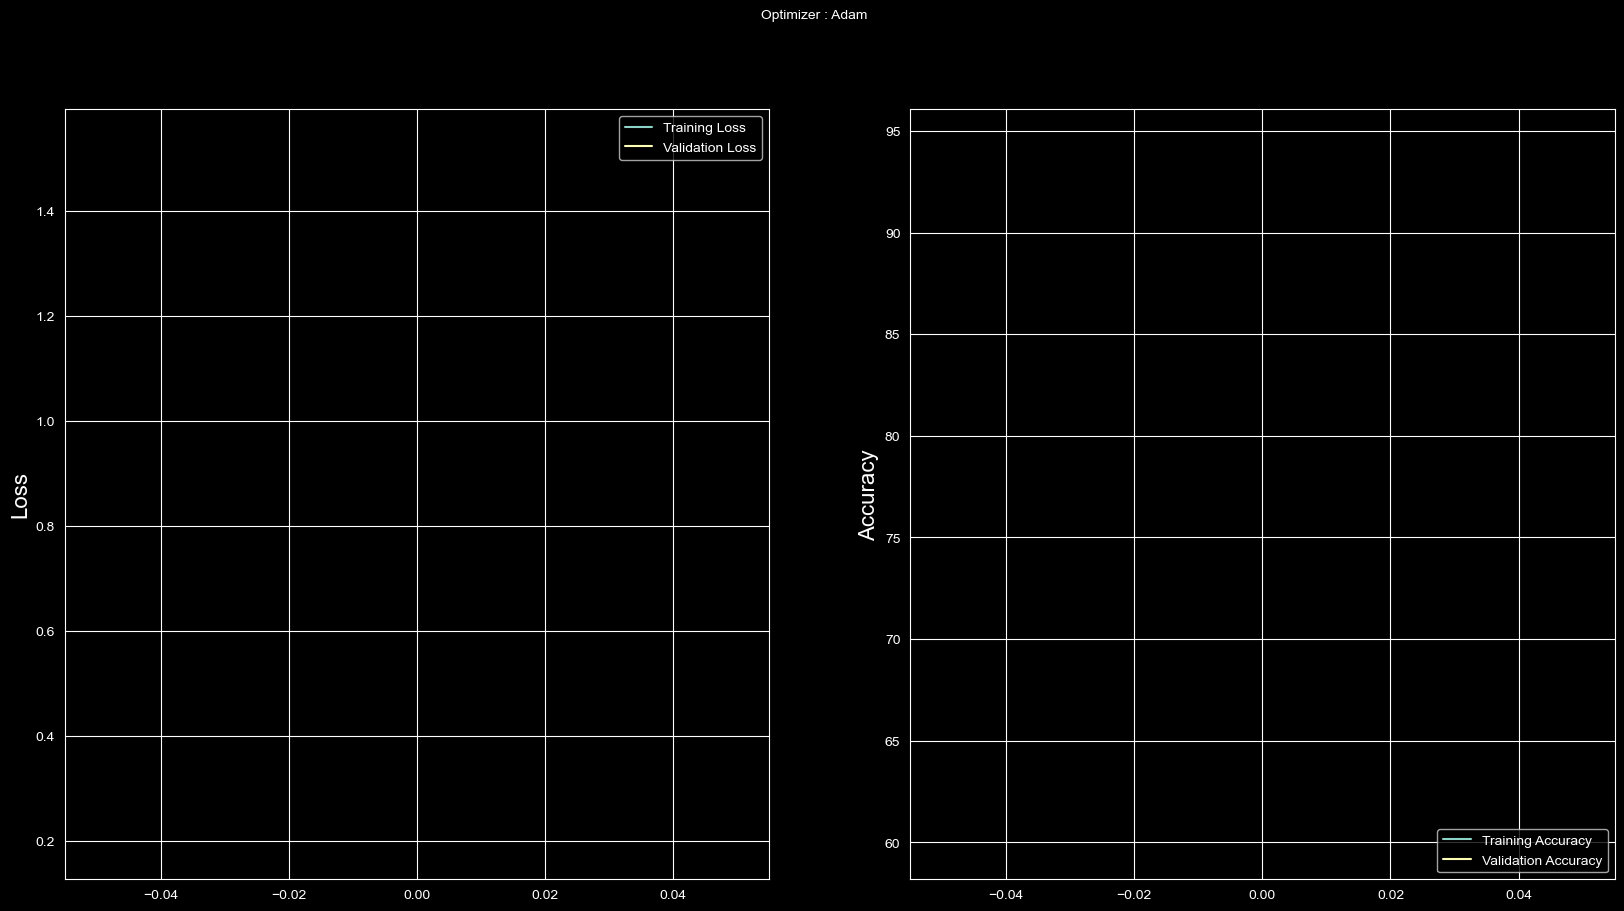

In [47]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(train_score[0], label='Training Loss')
plt.plot(test_score[0], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(100*train_score[1], label='Training Accuracy')
plt.plot(100*test_score[1], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step


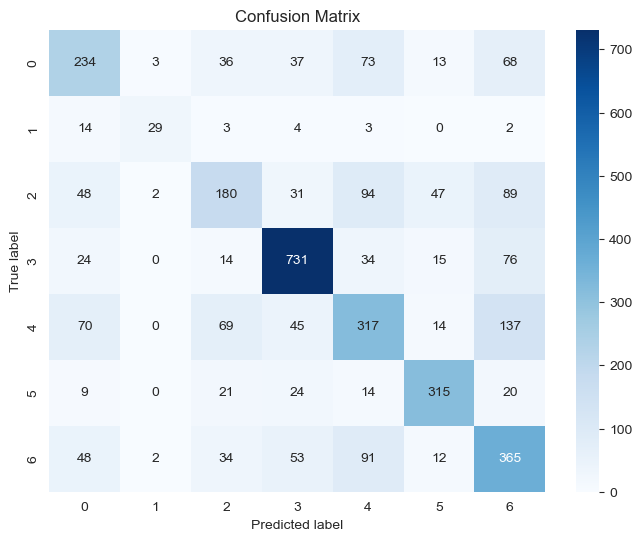

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
#from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your model and obtained predictions on test data
# Replace these with your actual predictions and true labels
y_pred = np.argmax(model.predict(X_test), axis=1)

y_true = np.argmax(test_y, axis=1)  # Convert one-hot encoded true labels back to categorical

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Second Model Try

In [37]:
# Modelin çalışması 64 Dakika 53.3 Saniye sürdü.

history = model.fit(X_train, train_y, epochs=10, validation_data=(X_test, test_y))


Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 392s 456ms/step - accuracy: 0.7909 - loss: 0.5725 - val_accuracy: 0.5974 - val_loss: 1.3867
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 377s 438ms/step - accuracy: 0.7944 - loss: 0.5637 - val_accuracy: 0.6002 - val_loss: 1.3859
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 360s 419ms/step - accuracy: 0.8047 - loss: 0.5315 - val_accuracy: 0.5934 - val_loss: 1.4673
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 381s 443ms/step - accuracy: 0.8231 - loss: 0.4892 - val_accuracy: 0.5971 - val_loss: 1.4139
Epoch 5/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 388s 451ms/step - accuracy: 0.8296 - loss: 0.4665 - val_accuracy: 0.5920 - val_loss: 1.5262
Epoch 6/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 371s 431ms/step - accuracy: 0.8339 - loss: 0.4640 - val_accuracy: 0.5940 - val_loss: 1.4672
Epoch 7/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 371s 431ms/step - accuracy: 0.8371 - loss: 0.4422 - val_accuracy: 0.6094 - val_loss: 1.5348
Epoch 8/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 463s 538ms/step - accuracy: 0.8431 -

In [43]:
train_losses1 = history.history['loss']
test_losses1 = history.history['val_loss']
train_accuracies1 = history.history['accuracy']
test_accuracies1 = history.history['val_accuracy']
epochs1 = range(1, len(train_losses1) + 1)

In [56]:
# Son Epoch Sayısına Göre

print("Train Loss :", train_losses1[-1])
print("Test Loss :", test_losses1[-1])
print()
print("Train Accuracy :", train_accuracies1[-1])
print("Test Accuracy :", test_accuracies1[-1])

Train Loss : 0.42251652479171753
Test Loss : 1.5263561010360718

Train Accuracy : 0.8470652103424072
Test Accuracy : 0.6091470122337341


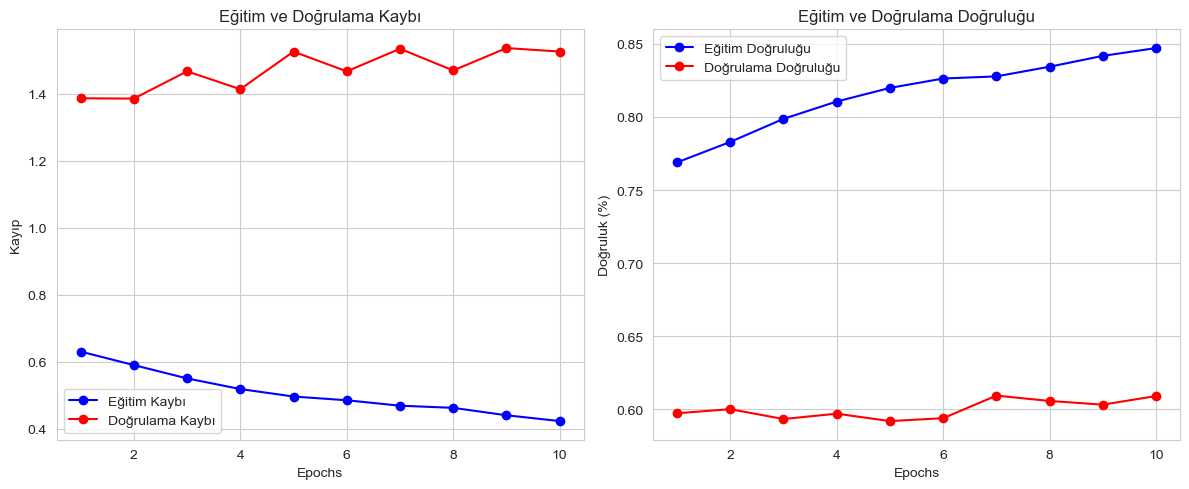

In [44]:
import matplotlib.pyplot as plt

# Kayıp grafiği
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs1, train_losses1, 'bo-', label='Eğitim Kaybı')
plt.plot(epochs1, test_losses1, 'ro-', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs1, train_accuracies1, 'bo-', label='Eğitim Doğruluğu')
plt.plot(epochs1, test_accuracies1, 'ro-', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk (%)')
plt.legend()

plt.tight_layout()
plt.show()


## Prediction

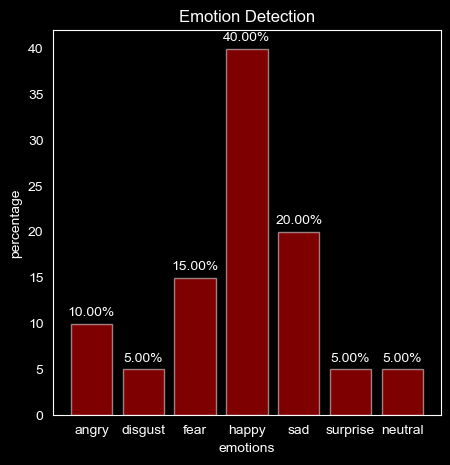

In [142]:

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    # Grafik boyutunu ayarlama
    plt.figure(figsize=(5, 5))  # Boyutları küçültmek için figsize parametresini ayarlayın
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5, color='red')
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.xlabel('emotions')
    plt.title('Emotion Detection')
    
    # Barların üstüne değerleri yazdırma
    for i, v in enumerate(emotions):
        plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom')
    
    # Grid çizgilerini kaldırma
    plt.grid(False)
    
    plt.show()

# Örnek kullanım
emotions = [10, 5, 15, 40, 20, 5, 5]
emotion_analysis(emotions)


In [149]:
from PIL import Image
img = Image.open("prediction/suprise.png").convert("L") 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


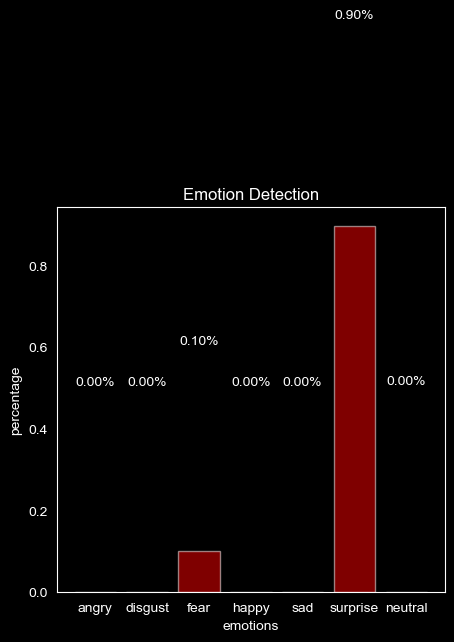

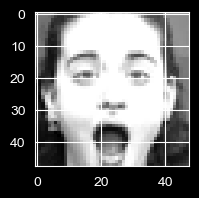

In [150]:
#from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

# Resmi yükleme ve işleme
#img = image.load_img("image_1.jpg", target_size=(48, 48))

# Görüntüyü 48x48 boyutuna yeniden boyutlandır
img = img.resize((48, 48))

# Görüntüyü grayscale'e çevir
img = img.convert('L')

# Görüntüyü numpy array'e çevir
img_array = np.array(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255


# Model tahmini
custom = model.predict(x)
emotion_analysis(custom[0])

# Resmi yeniden şekillendirme ve gösterme
x = np.array(x, 'float32')
x = x.reshape([48, 48])

# Grafik boyutunu ayarlama
plt.figure(figsize=(2,2)) # Boyutları küçültmek için figsize parametresini ayarlayın
plt.gray()
plt.imshow(x)
plt.show()



## Real Time Emotion Analyses

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import os
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
classifier =load_model("model.new.h5")

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Deep Face Library

In [1]:
from deepface import DeepFace

import cv2 # Resmi okutmak için

import matplotlib.pyplot as plt # Resmi göstermek için

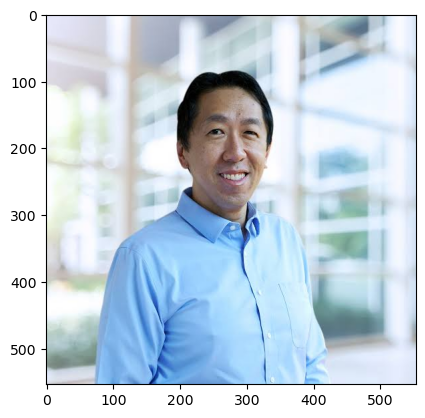

Action: race: 100%|██████████| 4/4 [00:19<00:00,  4.94s/it]   

[{'emotion': {'angry': 6.179246838655672e-05, 'disgust': 4.784626583820284e-08, 'fear': 0.00022799188172939466, 'happy': 98.50810170173645, 'sad': 0.0021196499801590107, 'surprise': 0.31801394652575254, 'neutral': 1.1714755557477474}, 'dominant_emotion': 'happy', 'region': {'x': 205, 'y': 118, 'w': 147, 'h': 147, 'left_eye': (303, 179), 'right_eye': (255, 177)}, 'face_confidence': 0.95, 'age': 28, 'gender': {'Woman': 0.044303954928182065, 'Man': 99.95569586753845}, 'dominant_gender': 'Man', 'race': {'asian': 99.9685525894165, 'indian': 0.004178699236945249, 'black': 2.608129534564796e-06, 'white': 0.0033576787245692685, 'middle eastern': 4.477841208938571e-07, 'latino hispanic': 0.023915247584227473}, 'dominant_race': 'asian'}]


In [2]:
img_path = "prediction/andrew.jpeg" # tests isimli klasörün içinde bulunan resmi çağırmak için

img_deepface = cv2.imread(img_path)

plt.imshow(img_deepface[:,:, ::-1]) # Resmi gösterir, [:,:, ::-1] resmi orjinal rengi ile gösterir (bu kod olmazsa resim mavi tonlarda görüntülenir)
plt.show()

resp = DeepFace.analyze(img_path
                        #,["age,"gender"]
                       ) # default olarak "emotion","age","gender" ve "race" analizi yapar.

print(resp)  # "emotion ,age, gender ve race" özeliklerini bir arada verir.

In [3]:
print("Emotion :", resp[0]["dominant_emotion"])
print()
print("Age :", resp[0]["age"])
print()
print("Gender :", resp[0]["dominant_gender"])
print()
print("Race :", resp[0]["dominant_race"])

Emotion : happy

Age : 28

Gender : Man

Race : asian
